In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score, silhouette_samples
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
import warnings

In [2]:
pd.set_option('display.max_columns',None)
warnings.filterwarnings("ignore")

In [3]:
X = pd.read_csv('../dados_processados/cursos-ufrpe-pos-processamento.csv',sep=';')

In [4]:
X.shape

(3205, 37)

In [5]:
X_to_train = X.drop(['no_curso','co_curso'],axis=1)

In [6]:
min_clusters = 2
max_clusters = 20
results = []

for n_clusters in range(min_clusters, max_clusters + 1):
    agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    labels = agg_clustering.fit_predict(X_to_train)

    silhouette = silhouette_score(X_to_train, labels)
    calinski = calinski_harabasz_score(X_to_train, labels)
    davies = davies_bouldin_score(X_to_train, labels)

    results.append((n_clusters, silhouette, calinski, davies))

columns = ["Cluster", "Silhouette Coefficient", "Calinski-Harabasz Index", "Davies-Bouldin Index"]
df = pd.DataFrame(results, columns=columns)

In [7]:
df

,Cluster,Silhouette Coefficient,Calinski-Harabasz Index,Davies-Bouldin Index
0,2,0.217883,599.681986,2.140971
1,3,0.083295,390.989981,2.265922
2,4,0.035602,314.308859,2.777680
3,5,0.034258,272.672549,2.739012
4,6,0.040766,245.178730,2.895780
5,7,0.048182,225.520928,2.857619
6,8,0.053260,211.998787,2.778220
7,9,0.057946,199.833421,2.693128
8,10,0.065070,190.951786,2.636382
9,11,0.068760,183.052340,2.556514


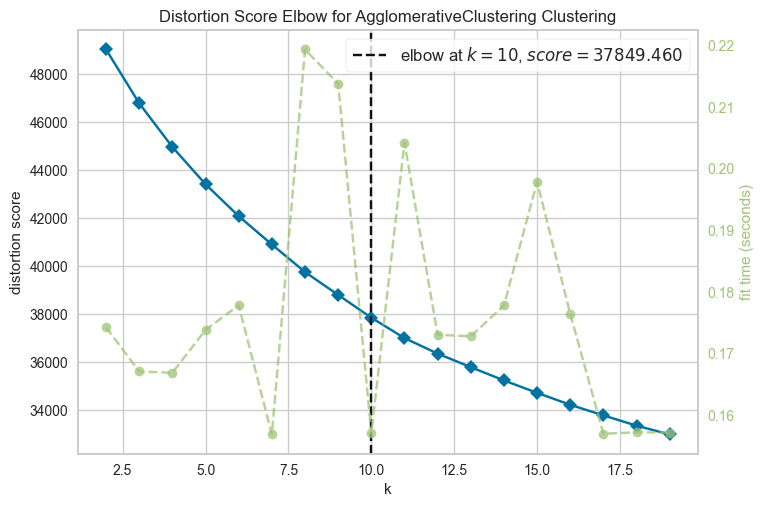

<Axes: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [8]:
visualizer = KElbowVisualizer(AgglomerativeClustering(linkage='ward'), k=(2, 20))
visualizer.fit(X_to_train)
visualizer.show()

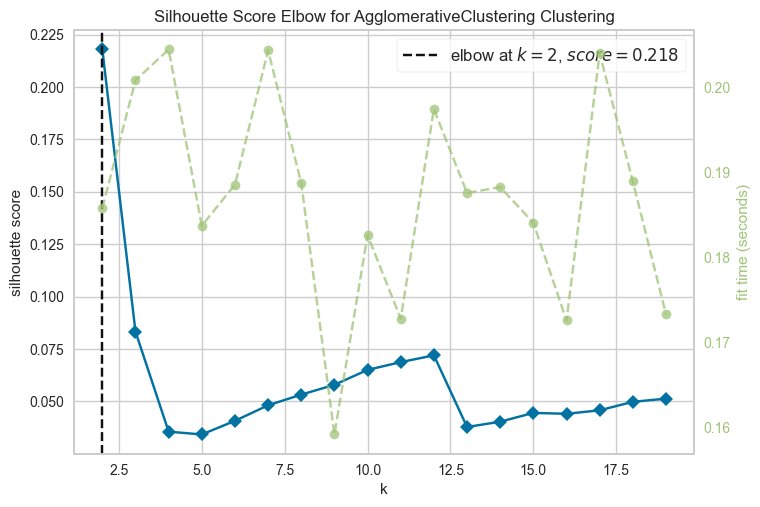

<Axes: title={'center': 'Silhouette Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='silhouette score'>

In [9]:
visualizer = KElbowVisualizer(AgglomerativeClustering(linkage='ward'), k=(2, 20),metric='silhouette')
visualizer.fit(X_to_train)
visualizer.show()

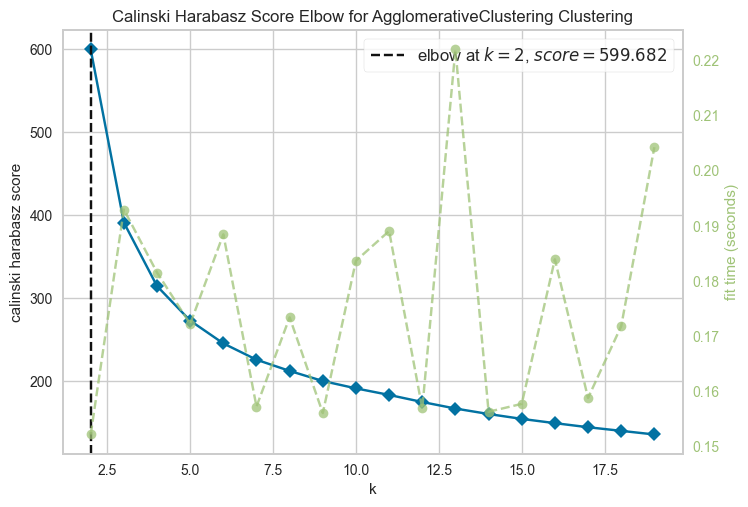

<Axes: title={'center': 'Calinski Harabasz Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [10]:
visualizer = KElbowVisualizer(AgglomerativeClustering(linkage='ward'), k=(2, 20),metric='calinski_harabasz')
visualizer.fit(X_to_train)
visualizer.show()